In [12]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score,roc_curve,roc_auc_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.svm import SVC

In [2]:
df=pd.read_csv('breast_cancer.csv')
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [4]:
df.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [5]:
df.duplicated().sum()

0

In [6]:
df['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

In [7]:
df['diagnosis']=[1 if i=='M' else 0 for i in df['diagnosis']]

In [8]:
df['diagnosis'].value_counts()

0    357
1    212
Name: diagnosis, dtype: int64

<Axes: >

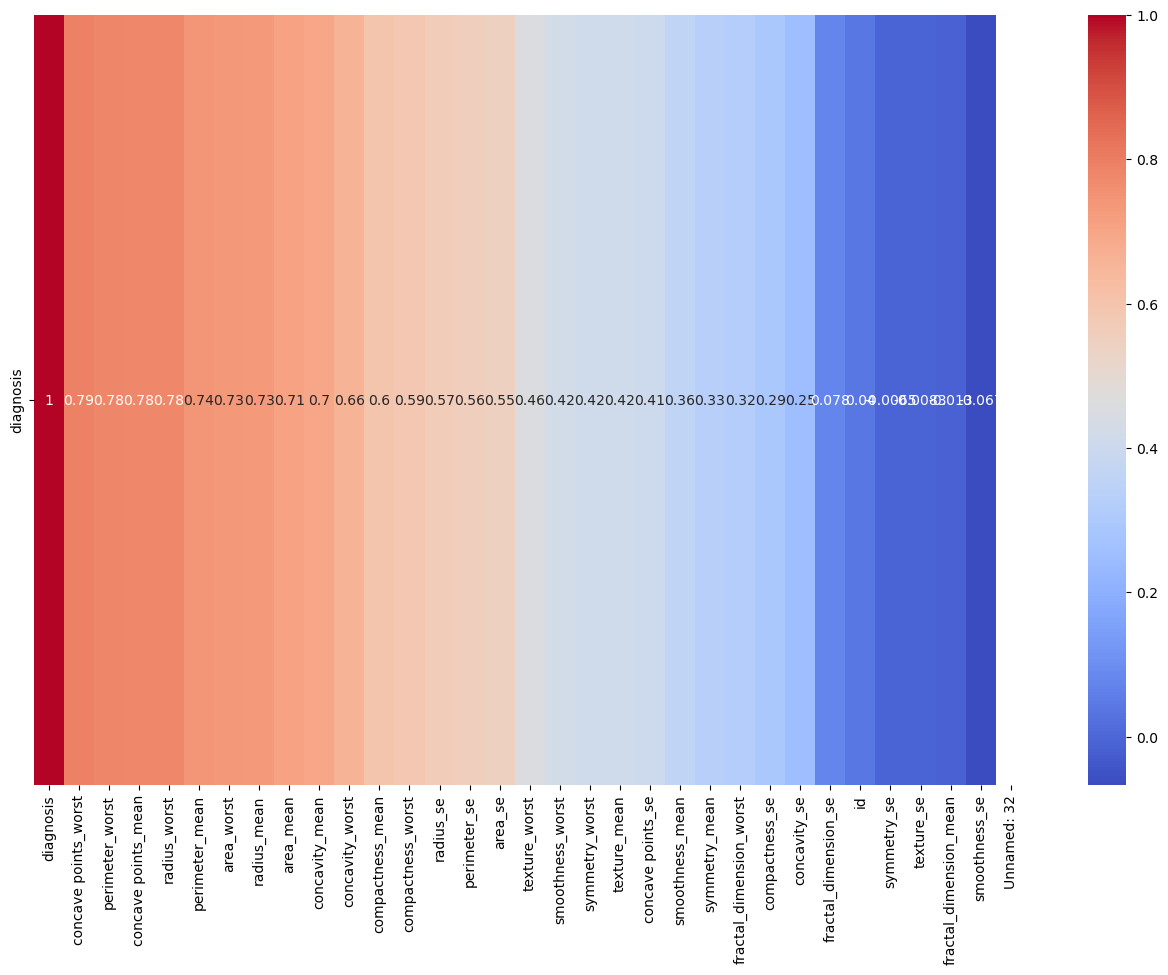

In [24]:
corr=df.corr()
frist_colm_corr=corr.iloc[:,1]

df_corr=pd.DataFrame({'diagnosis':frist_colm_corr})

sorted_corr=df_corr.sort_values(by='diagnosis', ascending=False)


plt.figure(figsize=(16,10))
sns.heatmap(sorted_corr.T, annot=True, cmap='coolwarm')

In [25]:
x=df.drop(['id','Unnamed: 32','diagnosis'],axis=1)
y=df['diagnosis']

In [36]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.3, random_state=42)

In [37]:
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

In [38]:
params = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto'],
}

In [39]:
svm = SVC()

In [40]:
grid_search = GridSearchCV(estimator=svm, param_grid=params, scoring='accuracy', cv=5)

In [41]:
grid_search.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10], 'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'rbf', 'poly']},
             scoring='accuracy')

In [42]:
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

In [43]:
y_pred = best_model.predict(x_test)

In [44]:
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_pred,y_test)
precision = precision_score(y_pred,y_test)
f1 = f1_score(y_pred,y_test)
print(f"Best hyperparameters: {best_params}")
print(f"The accuracy: {accuracy}")
print(f"The recall: {recall}")
print(f"The precision: {precision}")
print(f"The f1 score: {f1}")

Best hyperparameters: {'C': 0.1, 'gamma': 'scale', 'kernel': 'linear'}
The accuracy: 0.9824561403508771
The recall: 0.9838709677419355
The precision: 0.9682539682539683
The f1 score: 0.976


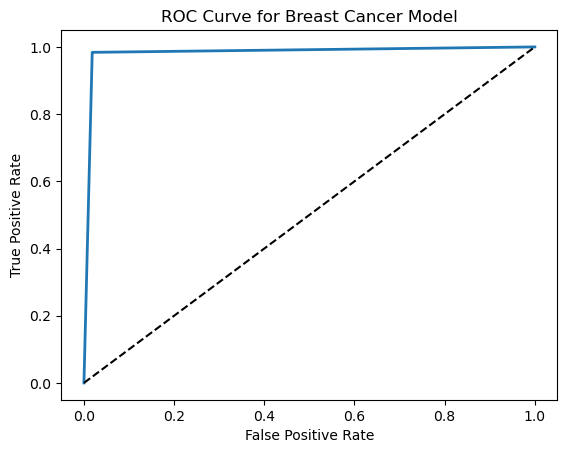

In [48]:
fpr,tpr,thresholds = roc_curve(y_pred,y_test)
plt.plot(fpr,tpr,linewidth=2)
plt.plot([0,1],[0,1],"k--")
plt.title("ROC Curve for Breast Cancer Model")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()